# Análise de Dados

![img](https://i.ibb.co/PM35f2X/paises.png)

Conjunto de dados: [Countries of the World](https://www.kaggle.com/fernandol/countries-of-the-world)

Nomes de países ligados à região, população, tamanho da área, PIB, mortalidade e mais.

#### Realizando os imports necessários

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#### Carregando o conjunto de dados (arquivo CSV)

In [3]:
mundo = pd.read_csv("países.csv")
mundo.head(10)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
5,Angola,SUB-SAHARAN AFRICA,12127071,1246700,"9,7","0,13",0,"191,19",1900.0,"42,0","7,8","2,41","0,24","97,35",NaN,"45,11","24,2","0,096","0,658","0,246"
6,Anguilla,LATIN AMER. & CARIB,13477,102,"132,1","59,80","10,76","21,03",8600.0,"95,0","460,0",0,0,100,2,"14,17","5,34","0,04","0,18","0,78"
7,Antigua & Barbuda,LATIN AMER. & CARIB,69108,443,"156,0","34,54","-6,15","19,46",11000.0,"89,0","549,9","18,18","4,55","77,27",2,"16,93","5,37","0,038","0,22","0,743"
8,Argentina,LATIN AMER. & CARIB,39921833,2766890,"14,4","0,18","0,61","15,18",11200.0,"97,1","220,4","12,31","0,48","87,21",3,"16,73","7,55","0,095","0,358","0,547"
9,Armenia,C.W. OF IND. STATES,2976372,29800,"99,9","0,00","-6,47","23,28",3500.0,"98,6","195,7","17,55","2,3","80,15",4,"12,07","8,23","0,239","0,343","0,418"


Em primeiro lugar, temos que conhecer nossos tipos de dados. 

Como sabemos, haverá alguns problemas com nossos tipos de dados e vamos mudar alguns deles para usá-los de forma eficaz.

In [4]:
mundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [5]:
mundo.dtypes

Country                                object
Region                                 object
Population                              int64
Area (sq. mi.)                          int64
Pop. Density (per sq. mi.)             object
Coastline (coast/area ratio)           object
Net migration                          object
Infant mortality (per 1000 births)     object
GDP ($ per capita)                    float64
Literacy (%)                           object
Phones (per 1000)                      object
Arable (%)                             object
Crops (%)                              object
Other (%)                              object
Climate                                object
Birthrate                              object
Deathrate                              object
Agriculture                            object
Industry                               object
Service                                object
dtype: object

Existem problemas com os nomes de nossas colunas. 

Precisamos corrigí-los, vamos então alterá-los através do atributo **columns**:

In [6]:
mundo.columns = (["country","region","population","area","density","coastline","migration",
                  "infant_mortality","gdp","literacy","phones","arable","crops","other","climate",
                  "birthrate","deathrate","agriculture","industry","service"])

Temos que mudar nosso tipo de dados para "**category**" e "**float**" para usarmos eles com mais facilidade:

In [7]:
mundo.country = mundo.country.astype('category')
mundo.region = mundo.region.astype('category')
mundo.density = mundo.density.str.replace(",",".").astype(float)
mundo.coastline = mundo.coastline.str.replace(",",".").astype(float)
mundo.migration = mundo.migration.str.replace(",",".").astype(float)
mundo.infant_mortality = mundo.infant_mortality.str.replace(",",".").astype(float)
mundo.literacy = mundo.literacy.str.replace(",",".").astype(float)
mundo.phones = mundo.phones.str.replace(",",".").astype(float)
mundo.arable = mundo.arable.str.replace(",",".").astype(float)
mundo.crops = mundo.crops.str.replace(",",".").astype(float)
mundo.other = mundo.other.str.replace(",",".").astype(float)
mundo.climate = mundo.climate.str.replace(",",".").astype(float)
mundo.birthrate = mundo.birthrate.str.replace(",",".").astype(float)
mundo.deathrate = mundo.deathrate.str.replace(",",".").astype(float)
mundo.agriculture = mundo.agriculture.str.replace(",",".").astype(float)
mundo.industry = mundo.industry.str.replace(",",".").astype(float)
mundo.service = mundo.service.str.replace(",",".").astype(float)

Agora os dados estão adequados para que possamos trabalhar com eles:

In [8]:
mundo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   country           227 non-null    category
 1   region            227 non-null    category
 2   population        227 non-null    int64   
 3   area              227 non-null    int64   
 4   density           227 non-null    float64 
 5   coastline         227 non-null    float64 
 6   migration         224 non-null    float64 
 7   infant_mortality  224 non-null    float64 
 8   gdp               226 non-null    float64 
 9   literacy          209 non-null    float64 
 10  phones            223 non-null    float64 
 11  arable            225 non-null    float64 
 12  crops             225 non-null    float64 
 13  other             225 non-null    float64 
 14  climate           205 non-null    float64 
 15  birthrate         224 non-null    float64 
 16  deathrate         223 non-

#### Valores Faltantes / Ausentes

Existem alguns valores **NaN** e eles serão um problema para nós. Portanto, temos que corrigi-los. 

Agora vamos ver quantos valores **NaN** existem em nosso conjunto de dados.

In [9]:
missing = mundo.isnull().sum()
missing

country              0
region               0
population           0
area                 0
density              0
coastline            0
migration            3
infant_mortality     3
gdp                  1
literacy            18
phones               4
arable               2
crops                2
other                2
climate             22
birthrate            3
deathrate            4
agriculture         15
industry            16
service             15
dtype: int64

Vamos preencher os valores ausentes usando o método **fillna**. 

Preencheremos os valores **NaN** com a **média** das colunas.

In [10]:
mundo.fillna(mundo.mean(),inplace=True)

Na coluna região, há alguns espaços antes e depois das regiões. Podemos corrigir esse problema com o método **strip()**.

In [11]:
mundo.region = mundo.region.str.strip()

Podemos agrupar nossos dados por regiões e ver a média de cada região.

In [12]:
grupo = mundo.groupby("region")
grupo.mean()

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
region,,,,,,,,,,,,,,,,,,
ASIA (EX. NEAR EAST),1.317137e+08,8.248826e+05,1264.825000,17.926786,1.372500,41.780000,8053.571429,79.553571,173.477194,15.874643,3.848929,80.276429,1.969251,21.157857,7.637143,0.177643,0.302143,0.520107
BALTICS,2.394991e+06,5.833833e+04,39.833333,3.116667,-2.033333,8.103333,11300.000000,99.733333,292.866667,30.310000,0.610000,69.080000,2.713008,9.343333,12.630000,0.045000,0.293333,0.661667
C.W. OF IND. STATES,2.334013e+07,1.841737e+06,56.708333,0.093333,-2.033333,44.410000,4000.000000,98.725000,163.850000,19.454167,2.022500,78.523333,2.481504,17.855833,10.341667,0.192000,0.328000,0.480167
EASTERN EUROPE,9.992893e+06,9.601850e+04,100.900000,1.035000,-0.647500,12.686667,9808.333333,93.526236,280.750000,30.982500,2.430833,66.587500,2.868089,11.349561,10.197612,0.092167,0.309250,0.598667
LATIN AMER. & CARIB,1.248499e+07,4.565352e+05,136.202222,15.972222,-1.494444,20.092667,8682.222222,90.480851,270.870254,10.790889,4.913556,84.295778,2.033333,19.081111,6.376000,0.093682,0.257298,0.646924
NEAR EAST,1.219177e+07,2.722241e+05,427.081250,3.602500,2.650000,23.377500,10456.250000,79.936035,210.797590,10.553750,5.105625,84.333125,1.696189,25.031875,4.809375,0.063812,0.406000,0.530000
NORTHERN AFRICA,2.690119e+07,1.003148e+06,38.933333,0.318333,-0.353646,31.681161,6164.970501,69.839713,122.843572,7.435000,2.805000,89.760000,1.713008,21.030789,5.545224,0.137641,0.402285,0.432000
NORTHERN AMERICA,6.633446e+07,4.356494e+06,260.860000,49.640000,-0.274000,8.628000,26100.000000,94.767656,686.740000,11.426000,0.048000,88.526000,2.055610,13.154000,7.694000,0.068738,0.232684,0.698313
OCEANIA,1.577698e+06,4.057053e+05,131.180952,107.885714,-1.860655,21.661139,8247.619048,87.693005,189.885714,7.667143,14.719524,77.613333,2.000000,22.108321,6.137271,0.169344,0.231312,0.598544


Agora nossos dados estão prontos, o pré-processamento de dados está concluído. 

Nossos dados estão limpos, vamos novamente olhar os dados gerais:

In [13]:
mundo.tail(10)

,country,region,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
217,Vanuatu,OCEANIA,208869,12200,17.1,20.72,0.000000,55.160000,2900.000000,53.000000,32.600000,2.46,7.38,90.16,2.0,22.720000,7.820000,0.260000,0.120000,0.620000
218,Venezuela,LATIN AMER. & CARIB,25730435,912050,28.2,0.31,-0.040000,22.200000,4800.000000,93.400000,140.100000,2.95,0.92,96.13,2.0,18.710000,4.920000,0.040000,0.419000,0.541000
219,Vietnam,ASIA (EX. NEAR EAST),84402966,329560,256.1,1.05,-0.450000,25.950000,2500.000000,90.300000,187.700000,19.97,5.95,74.08,2.0,16.860000,6.220000,0.209000,0.410000,0.381000
220,Virgin Islands,LATIN AMER. & CARIB,108605,1910,56.9,9.84,-8.940000,8.030000,17200.000000,82.838278,652.800000,11.76,2.94,85.30,2.0,13.960000,6.430000,0.010000,0.190000,0.800000
221,Wallis and Futuna,OCEANIA,16025,274,58.5,47.08,0.038125,35.506964,3700.000000,50.000000,118.600000,5.00,25.00,70.00,2.0,22.114732,9.241345,0.150844,0.282711,0.565283
222,West Bank,NEAR EAST,2460492,5860,419.9,0.00,2.980000,19.620000,800.000000,82.838278,145.200000,16.90,18.97,64.13,3.0,31.670000,3.920000,0.090000,0.280000,0.630000
223,Western Sahara,NORTHERN AFRICA,273008,266000,1.0,0.42,0.038125,35.506964,9689.823009,82.838278,236.061435,0.02,0.00,99.98,1.0,22.114732,9.241345,0.150844,0.282711,0.400000
224,Yemen,NEAR EAST,21456188,527970,40.6,0.36,0.000000,61.500000,800.000000,50.200000,37.200000,2.78,0.24,96.98,1.0,42.890000,8.300000,0.135000,0.472000,0.393000
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,15.3,0.00,0.000000,88.290000,800.000000,80.600000,8.200000,7.08,0.03,92.90,2.0,41.000000,19.930000,0.220000,0.290000,0.489000
226,Zimbabwe,SUB-SAHARAN AFRICA,12236805,390580,31.3,0.00,0.000000,67.690000,1900.000000,90.700000,26.800000,8.32,0.34,91.34,2.0,28.010000,21.840000,0.179000,0.243000,0.579000


A visualização de dados é a apresentação de dados em formato pictórico ou gráfico. 

Ele permite que os tomadores de decisão vejam as análises apresentadas visualmente, para que possam compreender conceitos difíceis ou identificar novos padrões. 

Agora vamos fazer algumas visualizações.

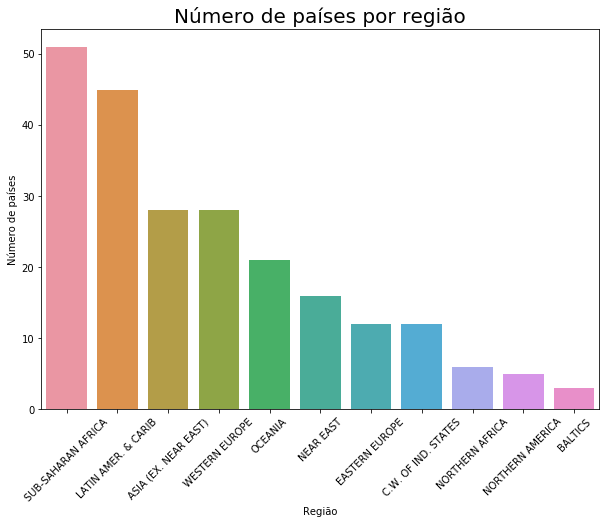

In [14]:
região = mundo.region.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=região.index, y=região.values)
plt.xticks(rotation=45)
plt.ylabel('Número de países')
plt.xlabel('Região')
plt.title('Número de países por região', color='k', fontsize=20);

Como você pode ver no gráfico, a região número um é a **África Subsaariana**. 

Vejamos agora o PIB, a mortalidade infantil, a taxa de natalidade e a taxa de mortalidade dos países.

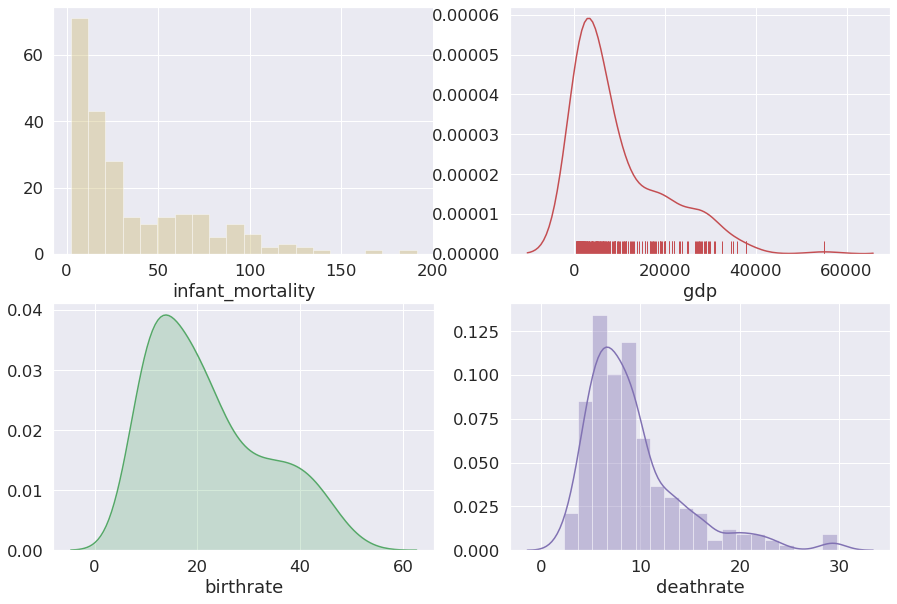

In [15]:
sns.set(style="darkgrid",font_scale=1.5)
f,axes = plt.subplots(2,2,figsize=(15,10))

sns.distplot(mundo.infant_mortality,bins=20,kde=False,color="y",ax=axes[0,0])
sns.distplot(mundo.gdp,hist=False,rug=True,color="r",ax=axes[0,1])
sns.distplot(mundo.birthrate,hist=False,color="g",kde_kws={"shade":True},ax=axes[1,0])
sns.distplot(mundo.deathrate,color="m",ax=axes[1,1]);

Text(0.5, 1.0, 'PIB por Região')

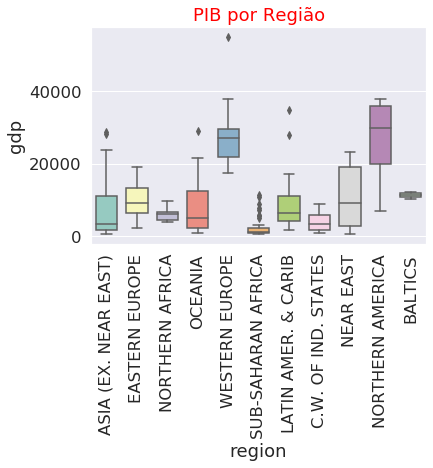

In [16]:
sns.boxplot(x="region",y="gdp",data=mundo,width=0.7,palette="Set3",fliersize=5);
plt.xticks(rotation=90)
plt.title("PIB por Região",color="red")

Agora, veremos a correlação de características. 

A correlação é uma técnica estatística que pode mostrar se e com que intensidade os pares de variáveis estão relacionados. 

Por exemplo, **altura** e **peso** estão relacionados; pessoas mais altas tendem a ser mais pesadas do que pessoas mais baixas. 

Quando dois conjuntos de dados estão fortemente vinculados, dizemos que eles têm uma alta correlação.

In [17]:
mundo.corr()

,population,area,density,coastline,migration,infant_mortality,gdp,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.022994,-0.039319,-0.043376,-0.030803,0.188201,-0.060741,-0.120575,-0.026439,-0.045075,-0.028354,0.000375,0.099109,-0.080681
area,0.469985,1.000000,-0.066917,-0.095627,0.047442,-0.007159,0.072179,0.035784,0.053360,-0.079674,-0.143844,0.138904,-0.082128,-0.066389,0.040049,-0.050380,0.120907,-0.054080
density,-0.028190,-0.066917,1.000000,0.241690,0.177990,-0.144200,0.195751,0.095056,0.280079,-0.080999,-0.031655,0.081844,0.006830,-0.159150,-0.070022,-0.105925,-0.105524,0.187798
coastline,-0.068199,-0.095627,0.241690,1.000000,-0.134035,-0.136465,0.049109,0.113651,0.152050,-0.120636,0.341433,-0.079404,-0.031614,-0.075715,-0.161703,-0.028483,-0.185124,0.181939
migration,0.000011,0.047442,0.177990,-0.134035,1.000000,-0.025015,0.381969,-0.008506,0.239424,-0.057689,-0.340151,0.222815,-0.014878,-0.066523,0.033605,-0.105674,-0.023679,0.113697
infant_mortality,0.022994,-0.007159,-0.144200,-0.136465,-0.025015,1.000000,-0.600002,-0.745543,-0.669715,-0.113094,-0.061159,0.123072,-0.342848,0.844968,0.655734,0.697303,0.003510,-0.618623
gdp,-0.039319,0.072179,0.195751,0.049109,0.381969,-0.600002,1.000000,0.497963,0.830549,0.019643,-0.218330,0.097215,0.302404,-0.648808,-0.201148,-0.570735,-0.027935,0.529995
literacy,-0.043376,0.035784,0.095056,0.113651,-0.008506,-0.745543,0.497963,1.000000,0.549913,0.101927,0.038808,-0.102439,0.352569,-0.755196,-0.386376,-0.585492,0.060661,0.465706
phones,-0.030803,0.053360,0.280079,0.152050,0.239424,-0.669715,0.830549,0.549913,1.000000,0.059606,-0.149517,0.029317,0.358574,-0.722329,-0.259708,-0.571704,-0.140516,0.625770
arable,0.188201,-0.079674,-0.080999,-0.120636,-0.057689,-0.113094,0.019643,0.101927,0.059606,1.000000,0.094361,-0.856763,0.353444,-0.183449,0.052991,-0.034080,-0.061923,0.088649


Vamos visualizar as correlações com um **Heatmap**:

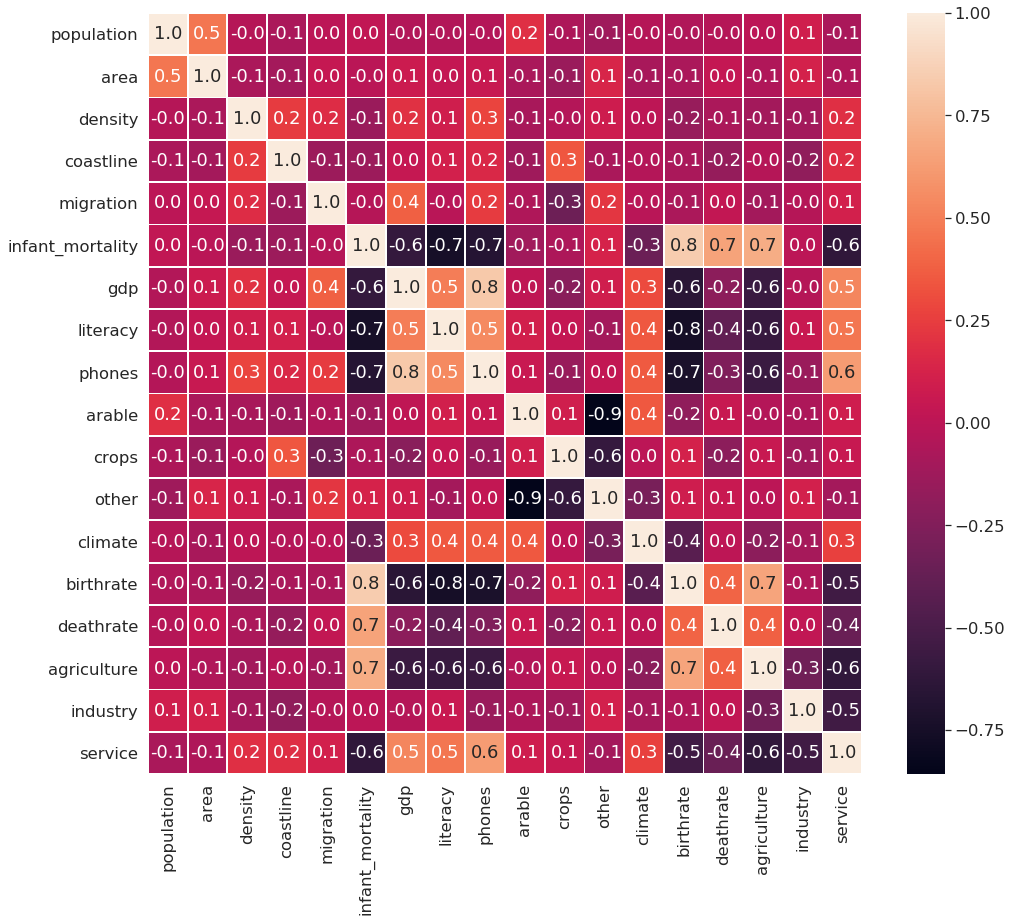

In [18]:
f,ax = plt.subplots(figsize=(16,14))
sns.heatmap(mundo.corr(), annot=True, linewidths=0.8, fmt= '.1f',ax=ax);

Existem relações com essas características: 

- PIB 
- Mortalidade infantil
- Taxa de natalidade
- Telefones
- Alfabetização
- Serviço

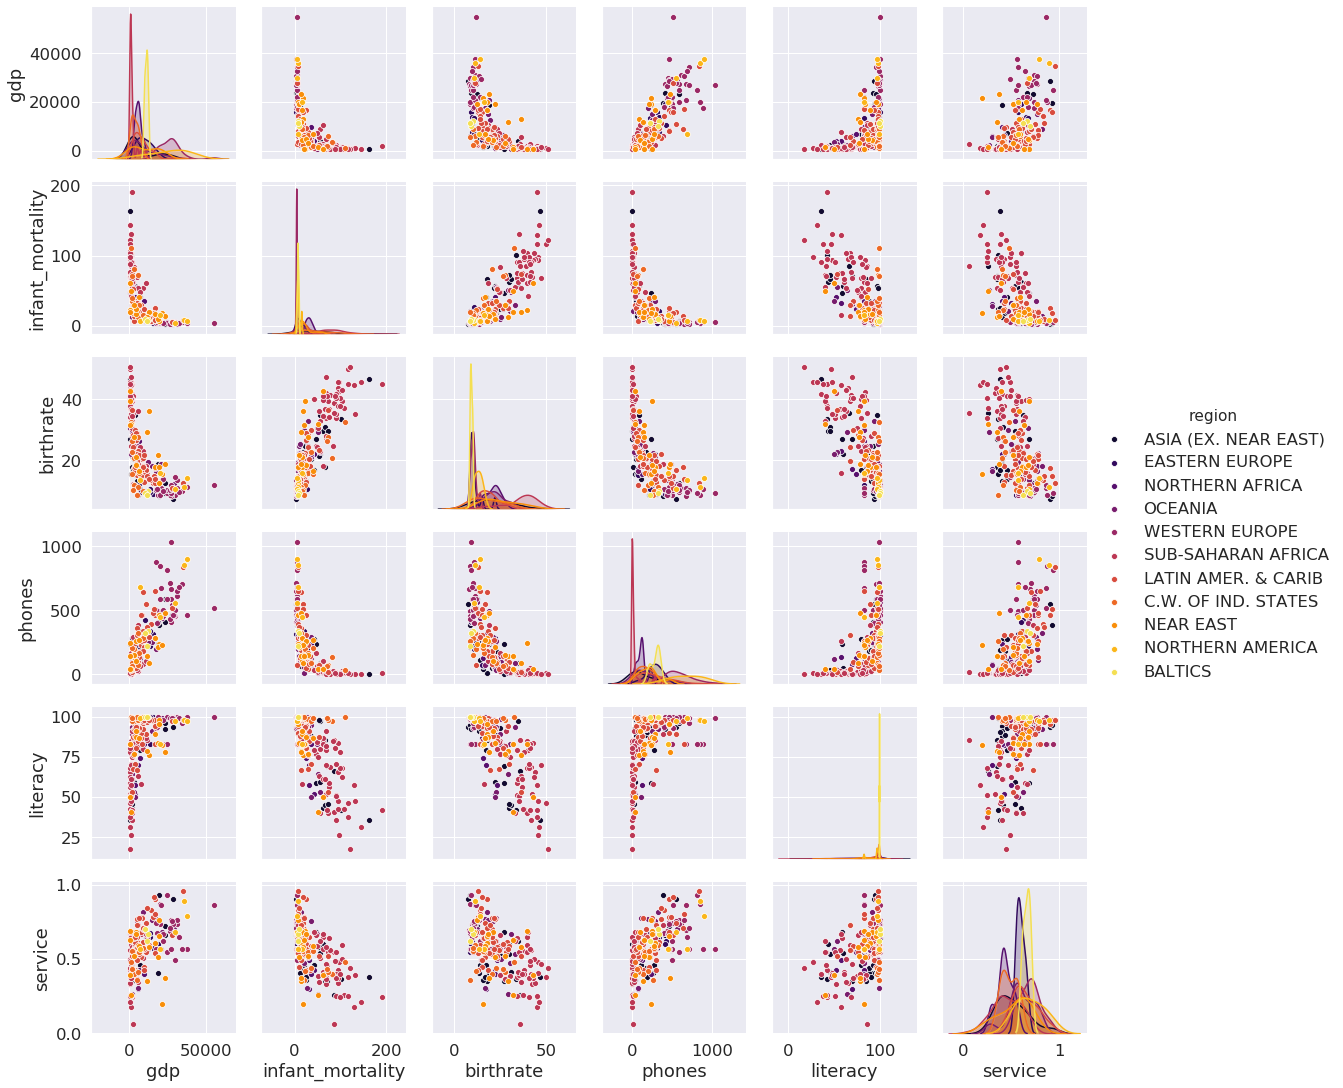

In [19]:
x = mundo.loc[:,["region","gdp","infant_mortality","birthrate","phones","literacy","service"]]
sns.pairplot(x,hue="region",palette="inferno");

PIB é o valor-chave. 

Como podemos observar, há uma correlação positiva entre "Telefones" e "Serviço". 

Vamos examinar esses dois recursos profundamente.

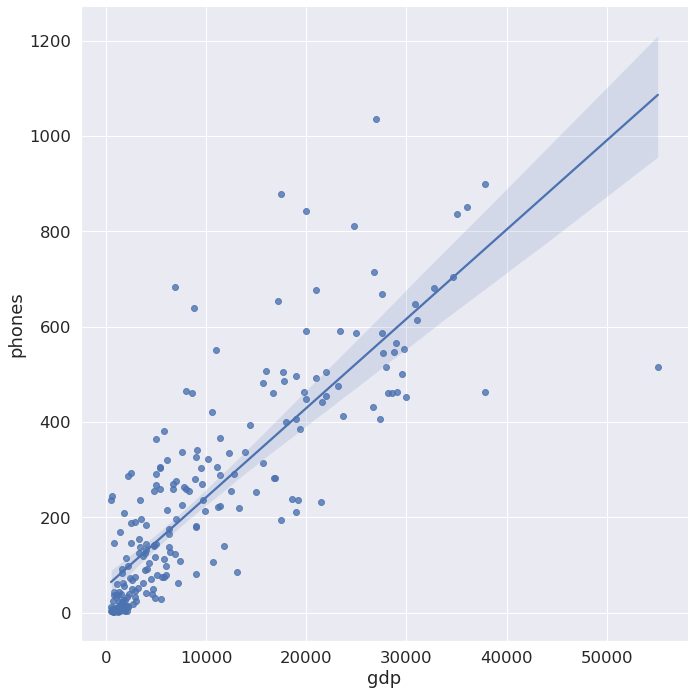

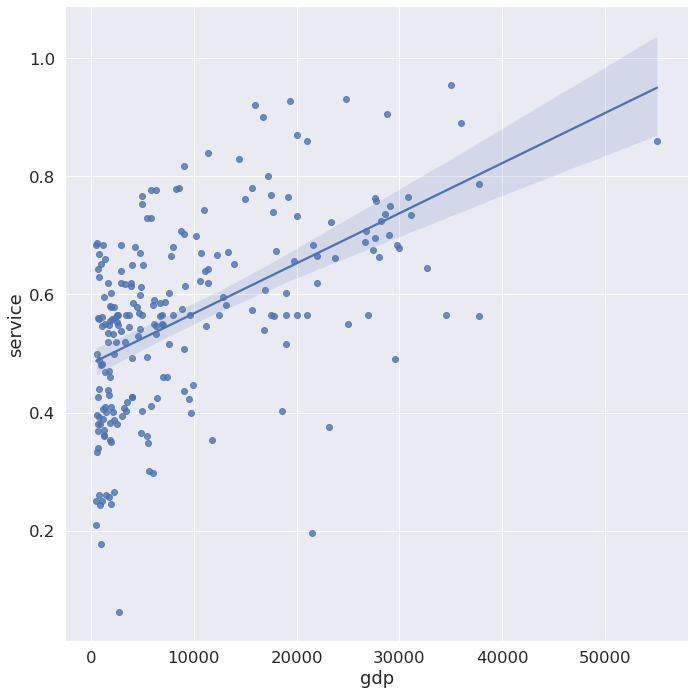

In [20]:
sns.lmplot(x="gdp",y="phones",data=mundo,height=10);
sns.lmplot(x="gdp",y="service",data=mundo,height=10);

Mais dinheiro = mais telefones.

Vamos fazer algumas visualizações interativas com **plotly**.

In [30]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

Vejamos a taxa de natalidade e a taxa de mortalidade dos 100 principais países e dos últimos 100 países de forma interativa.

In [33]:
gdp = mundo.sort_values(["gdp"],ascending=False)

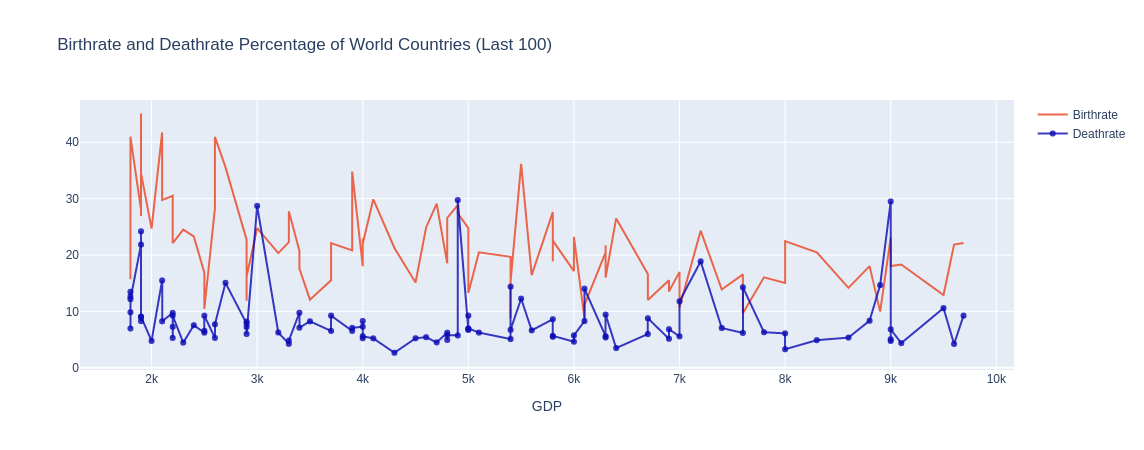

In [34]:
df = gdp.iloc[77:177,:]

trace1 = go.Scatter(x = df.gdp,
                    y = df.birthrate,
                    mode = "lines",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)

trace2 = go.Scatter(x = df.gdp,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)

z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate Percentage of World Countries (Last 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False))
fig = dict(data = z, layout = layout)
iplot(fig)

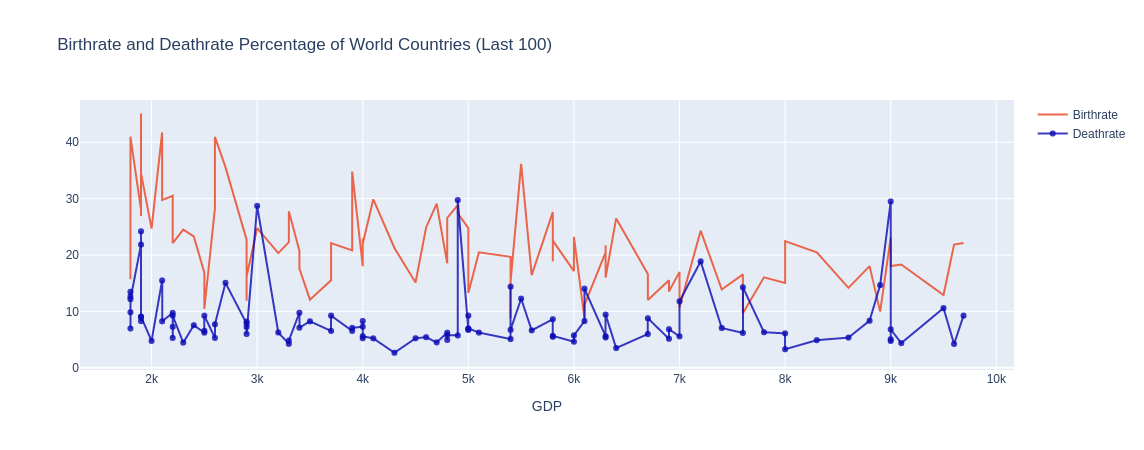

In [35]:
df = gdp.iloc[77:177,:]

trace1 = go.Scatter(x = df.gdp,
                    y = df.birthrate,
                    mode = "lines",
                    name = "Birthrate",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)

trace2 = go.Scatter(x = df.gdp,
                    y = df.deathrate,
                    mode = "lines+markers",
                    name = "Deathrate",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)

z = [trace1, trace2]
layout = dict(title = 'Birthrate and Deathrate Percentage of World Countries (Last 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False))
fig = dict(data = z, layout = layout)
iplot(fig)

Vejamos a porcentagem da agricultura, indústria e serviços dos 100 principais e dos últimos 100 países de forma interativa.

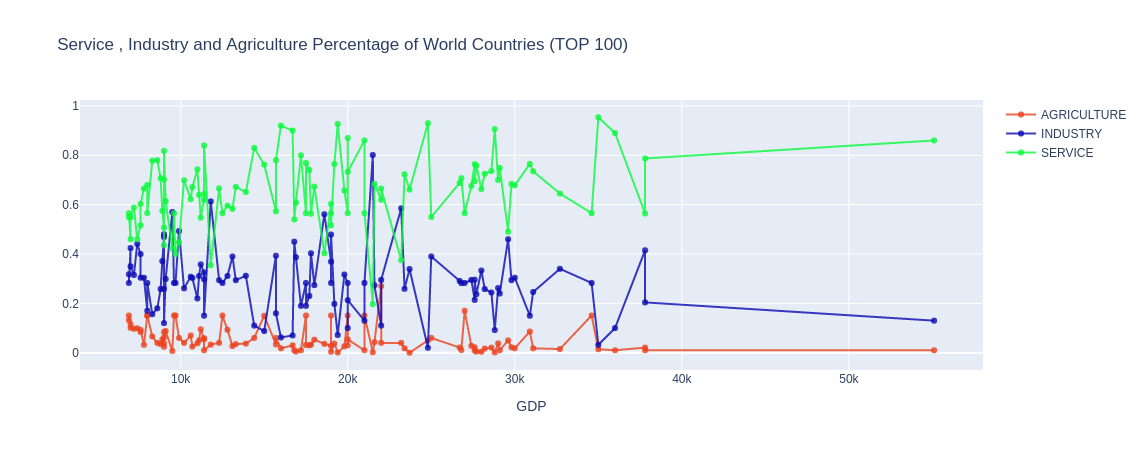

In [36]:
df = gdp.iloc[:100,:]

trace1 = go.Scatter(x = df.gdp,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)

trace2 = go.Scatter(x = df.gdp,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)

trace3 = go.Scatter(x = df.gdp,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 0.8)'),
                    text= df.country)

z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of World Countries (TOP 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False))
fig = dict(data = z, layout = layout)
iplot(fig)

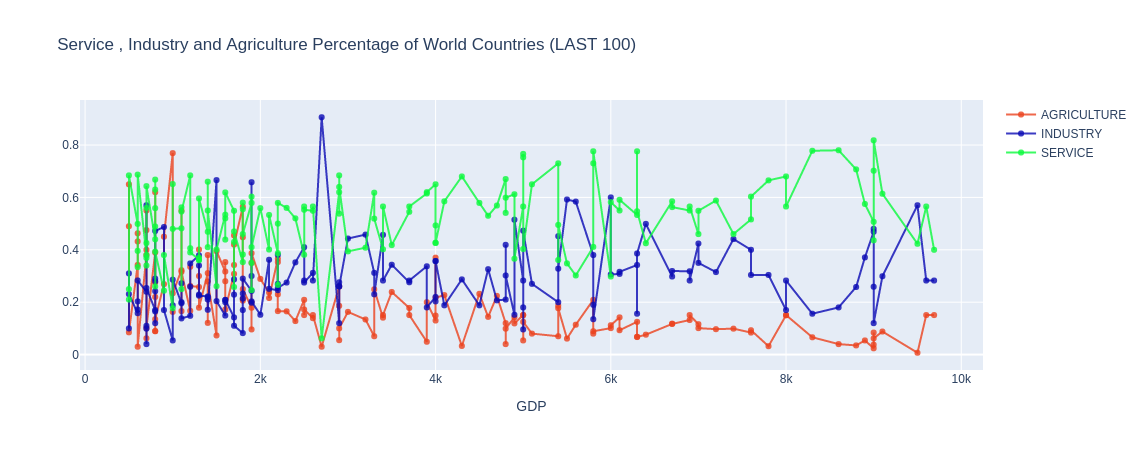

In [37]:
df = gdp.iloc[77:,:]

trace1 = go.Scatter(x = df.gdp,
                    y = df.agriculture,
                    mode = "lines+markers",
                    name = "AGRICULTURE",
                    marker = dict(color = 'rgba(235,66,30, 0.8)'),
                    text= df.country)

trace2 = go.Scatter(x = df.gdp,
                    y = df.industry,
                    mode = "lines+markers",
                    name = "INDUSTRY",
                    marker = dict(color = 'rgba(10,10,180, 0.8)'),
                    text= df.country)

trace3 = go.Scatter(x = df.gdp,
                    y = df.service,
                    mode = "lines+markers",
                    name = "SERVICE",
                    marker = dict(color = 'rgba(10,250,60, 0.8)'),
                    text= df.country)

z = [trace1, trace2,trace3]
layout = dict(title = 'Service , Industry and Agriculture Percentage of World Countries (LAST 100)',
              xaxis= dict(title= 'GDP',ticklen= 5,zeroline= False))
fig = dict(data = z, layout = layout)
iplot(fig)

Vejamos as características de agricultura e serviços dos 7 principais países (alfabetização).

In [39]:
lit = mundo.sort_values("literacy",ascending=False).head(7)

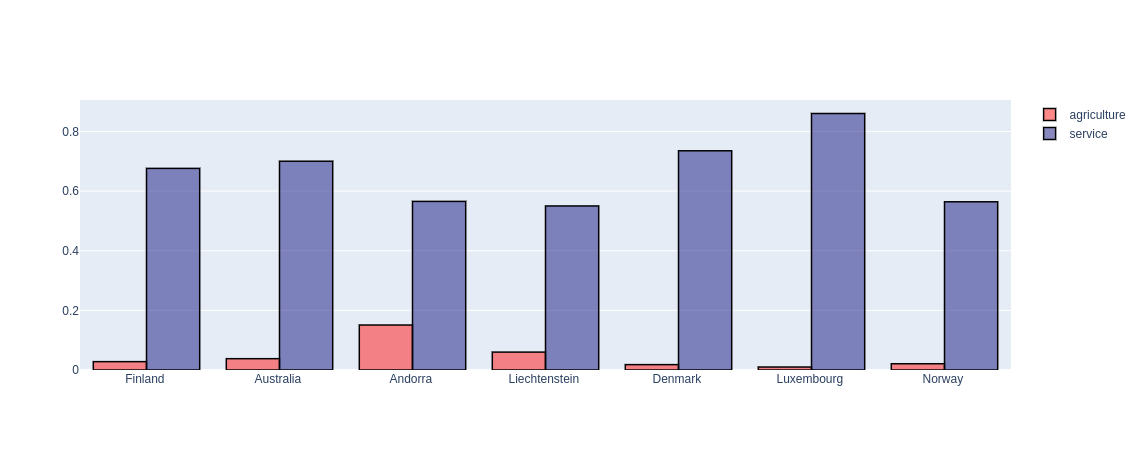

In [40]:
trace1 = go.Bar(x = lit.country,
                y = lit.agriculture,
                name = "agriculture",
                marker = dict(color = 'rgba(255, 20, 20, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = lit.gdp)

trace2 = go.Bar(x = lit.country,
                y = lit.service,
                name = "service",
                marker = dict(color = 'rgba(20, 20, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = lit.gdp)

data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

Vejamos as características da indústria e dos serviços dos 7 principais países (alfabetização).

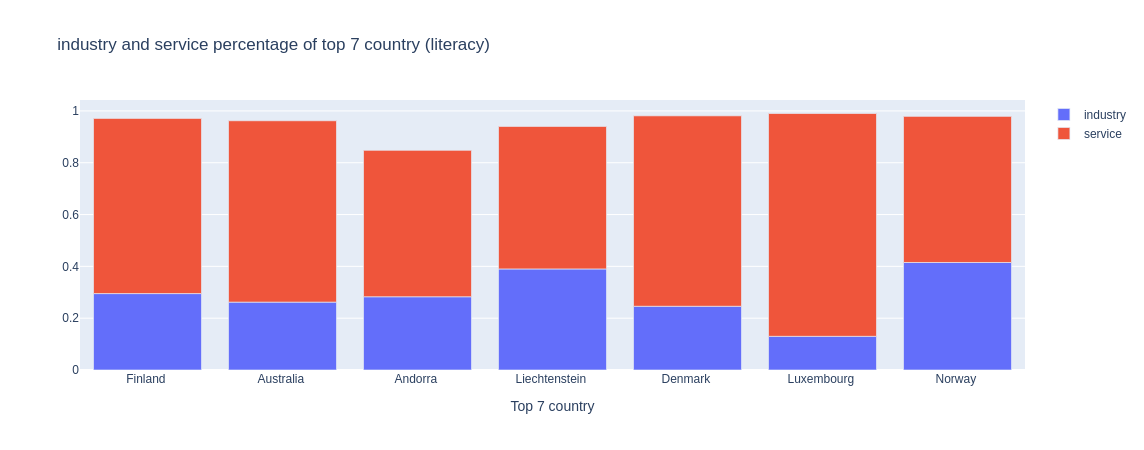

In [41]:
x = lit.country

trace1 = {
  'x': x,
  'y': lit.industry,
  'name': 'industry',
  'type': 'bar'
};

trace2 = {
  'x': x,
  'y': lit.service,
  'name': 'service',
  'type': 'bar'
};

data = [trace1, trace2];

layout = {
  'xaxis': {'title': 'Top 7 country'},
  'barmode': 'relative',
  'title': 'industry and service percentage of top 7 country (literacy)'
};

fig = go.Figure(data = data, layout = layout)
iplot(fig)

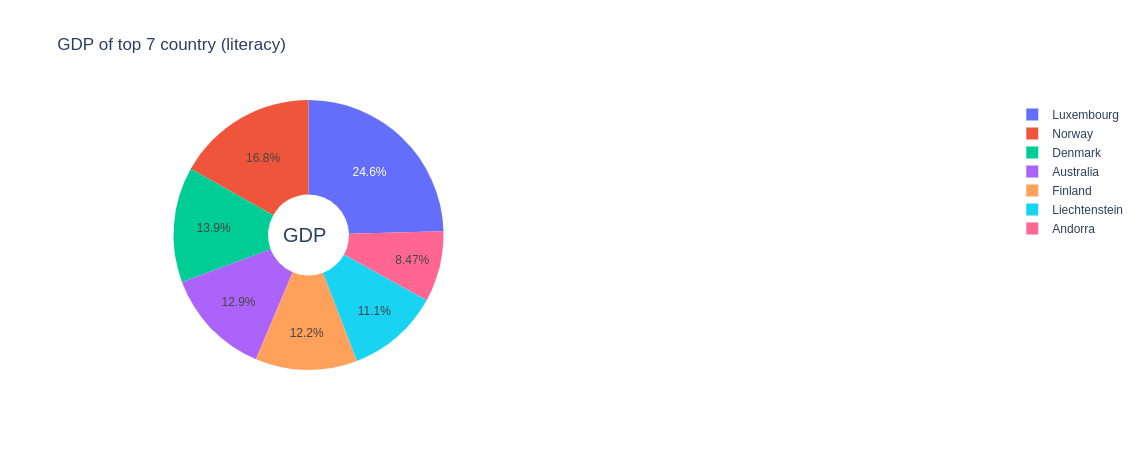

In [43]:
fig = {
  "data": [
    {
      "values": lit.gdp,
      "labels": lit.country,
      "domain": {"x": [0, .5]},
      "name": "GDP percentage of",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"GDP of top 7 country (literacy)",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "GDP",
                "x": 0.22,
                "y": 0.5
            },
        ]
    }
}
iplot(fig)

Vamos fazer um gráfico de bolhas com serviço e alfabetização dos países.

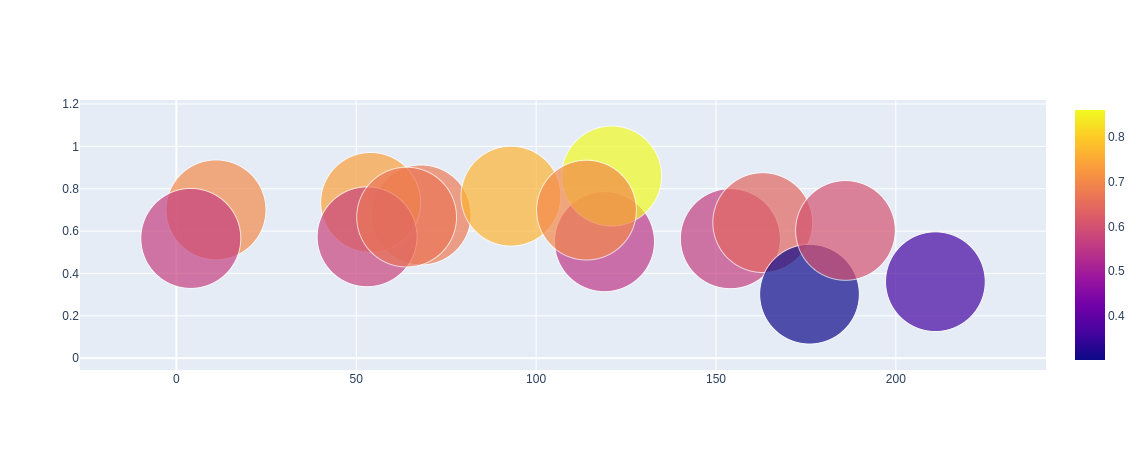

In [44]:
lite = mundo.sort_values("literacy",ascending=False).head(15)

data = [
    {
        'y': lite.service,
        'x': lite.index,
        'mode': 'markers',
        'marker': {
            'color': lite.service,
            'size': lite.literacy,
            'showscale': True
        },
        "text" :  lite.country    
    }
]

iplot(data)

Vamos fazer um mapa-múndi com plotagem interativa.

População por país:

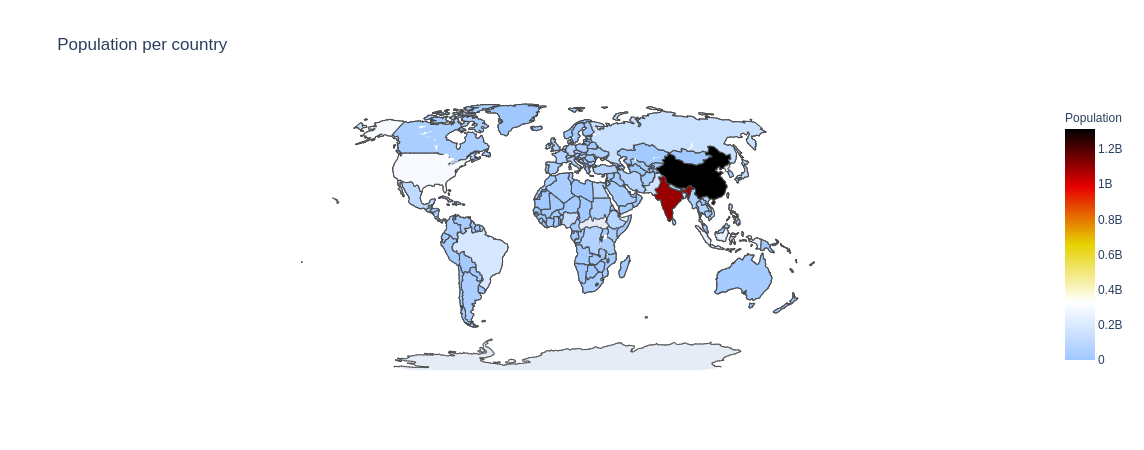

In [45]:
data = dict(type='choropleth',
locations = mundo.country,
locationmode = 'country names', z = mundo.population,
text = mundo.country, colorbar = {'title':'Population'},
colorscale = 'Blackbody', reversescale = True)
layout = dict(title='Population per country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

Mortalidade Infantil por país:

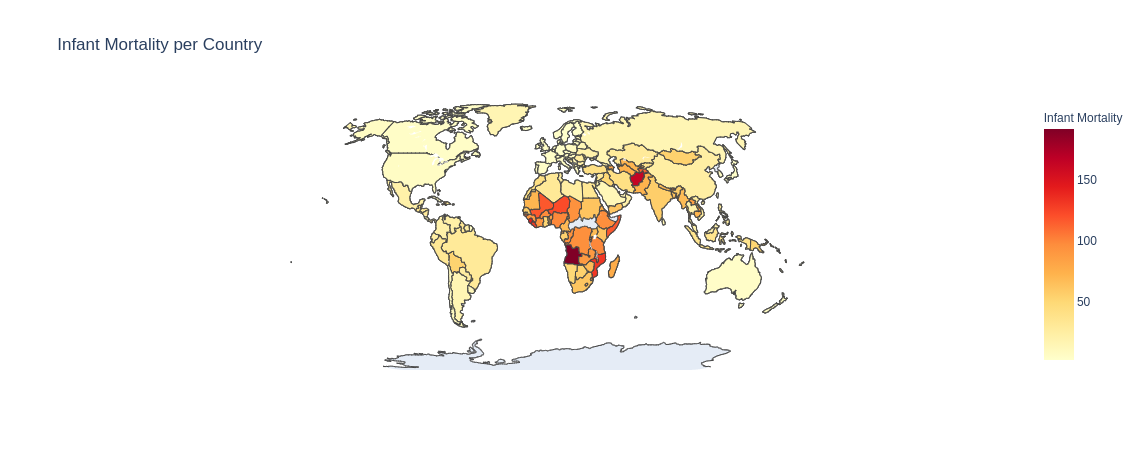

In [49]:
data = dict(type='choropleth',
locations = mundo.country,
locationmode = 'country names', z = mundo.infant_mortality,
text = mundo.country, colorbar = {'title':'Infant Mortality'},
colorscale = 'YlOrRd', reversescale = False)
layout = dict(title='Infant Mortality per Country',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)

PIB dos países do mundo:

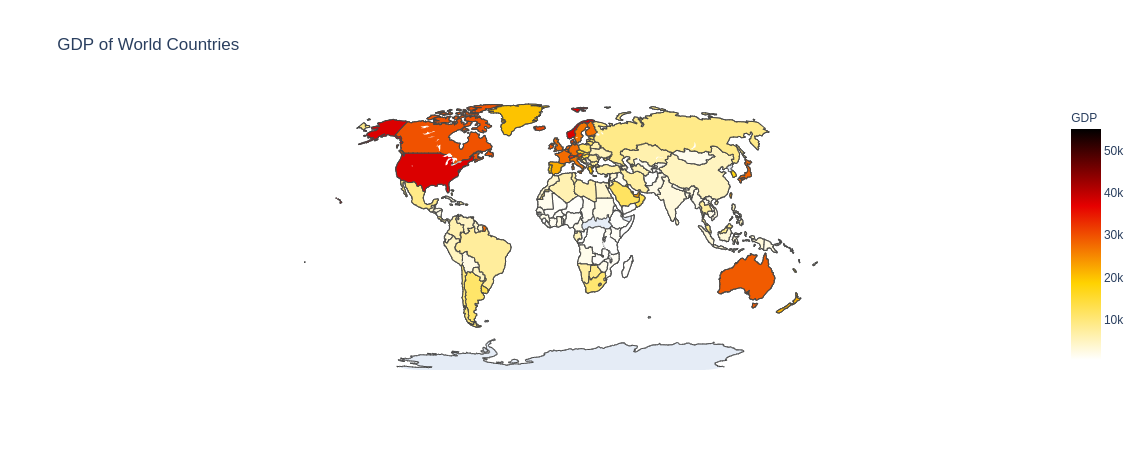

In [51]:
data = dict(type='choropleth',
locations = mundo.country,
locationmode = 'country names', z = mundo.gdp,
text = mundo.country, colorbar = {'title':'GDP'},
colorscale = 'Hot', reversescale = True)
layout = dict(title='GDP of World Countries',
geo = dict(showframe=False,projection={'type':'natural earth'}))
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap,validate=False)